In [1]:
import pandas as pd
import numpy as np

In [8]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
pres = pd.read_csv(url,index_col=0)
pres.head()

Seq.          President                  Party  Bg  Im  Int  IQ   L  WR  AC  \
1    1  George Washington            Independent   7   7    1  10   1   6   2   
2    2         John Adams             Federalist   3  13    4   4  24  14  31   
3    3   Thomas Jefferson  Democratic-Republican   2   2   14   1   8   5  14   
4    4      James Madison  Democratic-Republican   4   6    7   3  16  15   6   
5    5       James Monroe  Democratic-Republican   9  14   11  18   6  16   7   

   ...  PL  RC  CAp  HE  EAp  DA  FPA  AM  EV   O  
1  ...  18   1    1   1    1   2    2   1   2   1  
2  ...  28  17    4  13   15  19   13  16  10  14  
3  ...   5   5    7  20    4   6    9   7   5   5  
4  ...   9  10    6  14    7  11   19  11   8   7  
5  ...  12   8   11   9    9  10    5   6   9   8  

[5 rows x 24 columns]

In [6]:
def tweak_pres(df):
   def int64_to_unit(df_):
      cols = df_.select_dtypes('int64')
      return (df_.astype({col: 'uint8' for col in cols}))
   return (df
   .rename(columns={k:v.replace(' ','_') for k,v in 
      {'Bg': 'Background',
               'PL': 'Party leadership', 'CAb': ' Communication ability',
               'RC': 'Relations with Congress', 'CAp': 'Court appointments',
               'HE': 'Handling of economy', 'L': 'Luck',
               'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
               'EAp': 'Executive appointments', 'OA': 'Overall ability',
               'Im': 'Imagination', 'DA': 'Domestic accomplishments',
               'Int': 'Integrity', 'EAb': 'Executive ability',
               'FPA': 'Foreign policy accomplishments',
               'LA': 'Leadership ability',
               'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
               'EV': "Experts' view", 'O': 'Overall'}.items()})
   .pipe(int64_to_unit)
   .assign(Average_Rank = lambda df_:(df_.select_dtypes('uint8')
   .sum(axis=1).rank(method='dense').astype('uint8')),
   Quartile=lambda df_:(pd.qcut(df_.Average_Rank,4,labels='1st 2nd 3rd 4th'.split()))
   ))

In [9]:
pres = tweak_pres(pres)
pres.head()

Seq.          President                  Party  Background  Imagination  \
1    1  George Washington            Independent           7            7   
2    2         John Adams             Federalist           3           13   
3    3   Thomas Jefferson  Democratic-Republican           2            2   
4    4      James Madison  Democratic-Republican           4            6   
5    5       James Monroe  Democratic-Republican           9           14   

   Integrity  Intelligence  Luck  Willing_to_take_risks  \
1          1            10     1                      6   
2          4             4    24                     14   
3         14             1     8                      5   
4          7             3    16                     15   
5         11            18     6                     16   

   Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
1                      2  ...                   1                    1   
2                     31  ...                   4                   13   
3                     14  ...                   7                   20   
4                      6  ...                   6                   14   
5                      7  ...                  11                    9   

   Executive_appointments  Domestic_accomplishments  \
1                       1                         2   
2                      15                        19   
3                       4                         6   
4                       7                        11   
5                       9                        10   

   Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
1                               2                       1              2   
2                              13                      16             10   
3                               9                       7              5   
4                              19                      11              8   
5                               5                       6              9   

   Overall  Average_Rank  Quartile  
1        1             1       1st  
2       14            13       2nd  
3        5             5       1st  
4        7             7       1st  
5        8             8       1st  

[5 rows x 26 columns]

In [29]:
(pres
.set_index('President')
.loc[::2,'Background':'Overall']
.T
.plot(figsize=(20,5))
)

<AxesSubplot:>

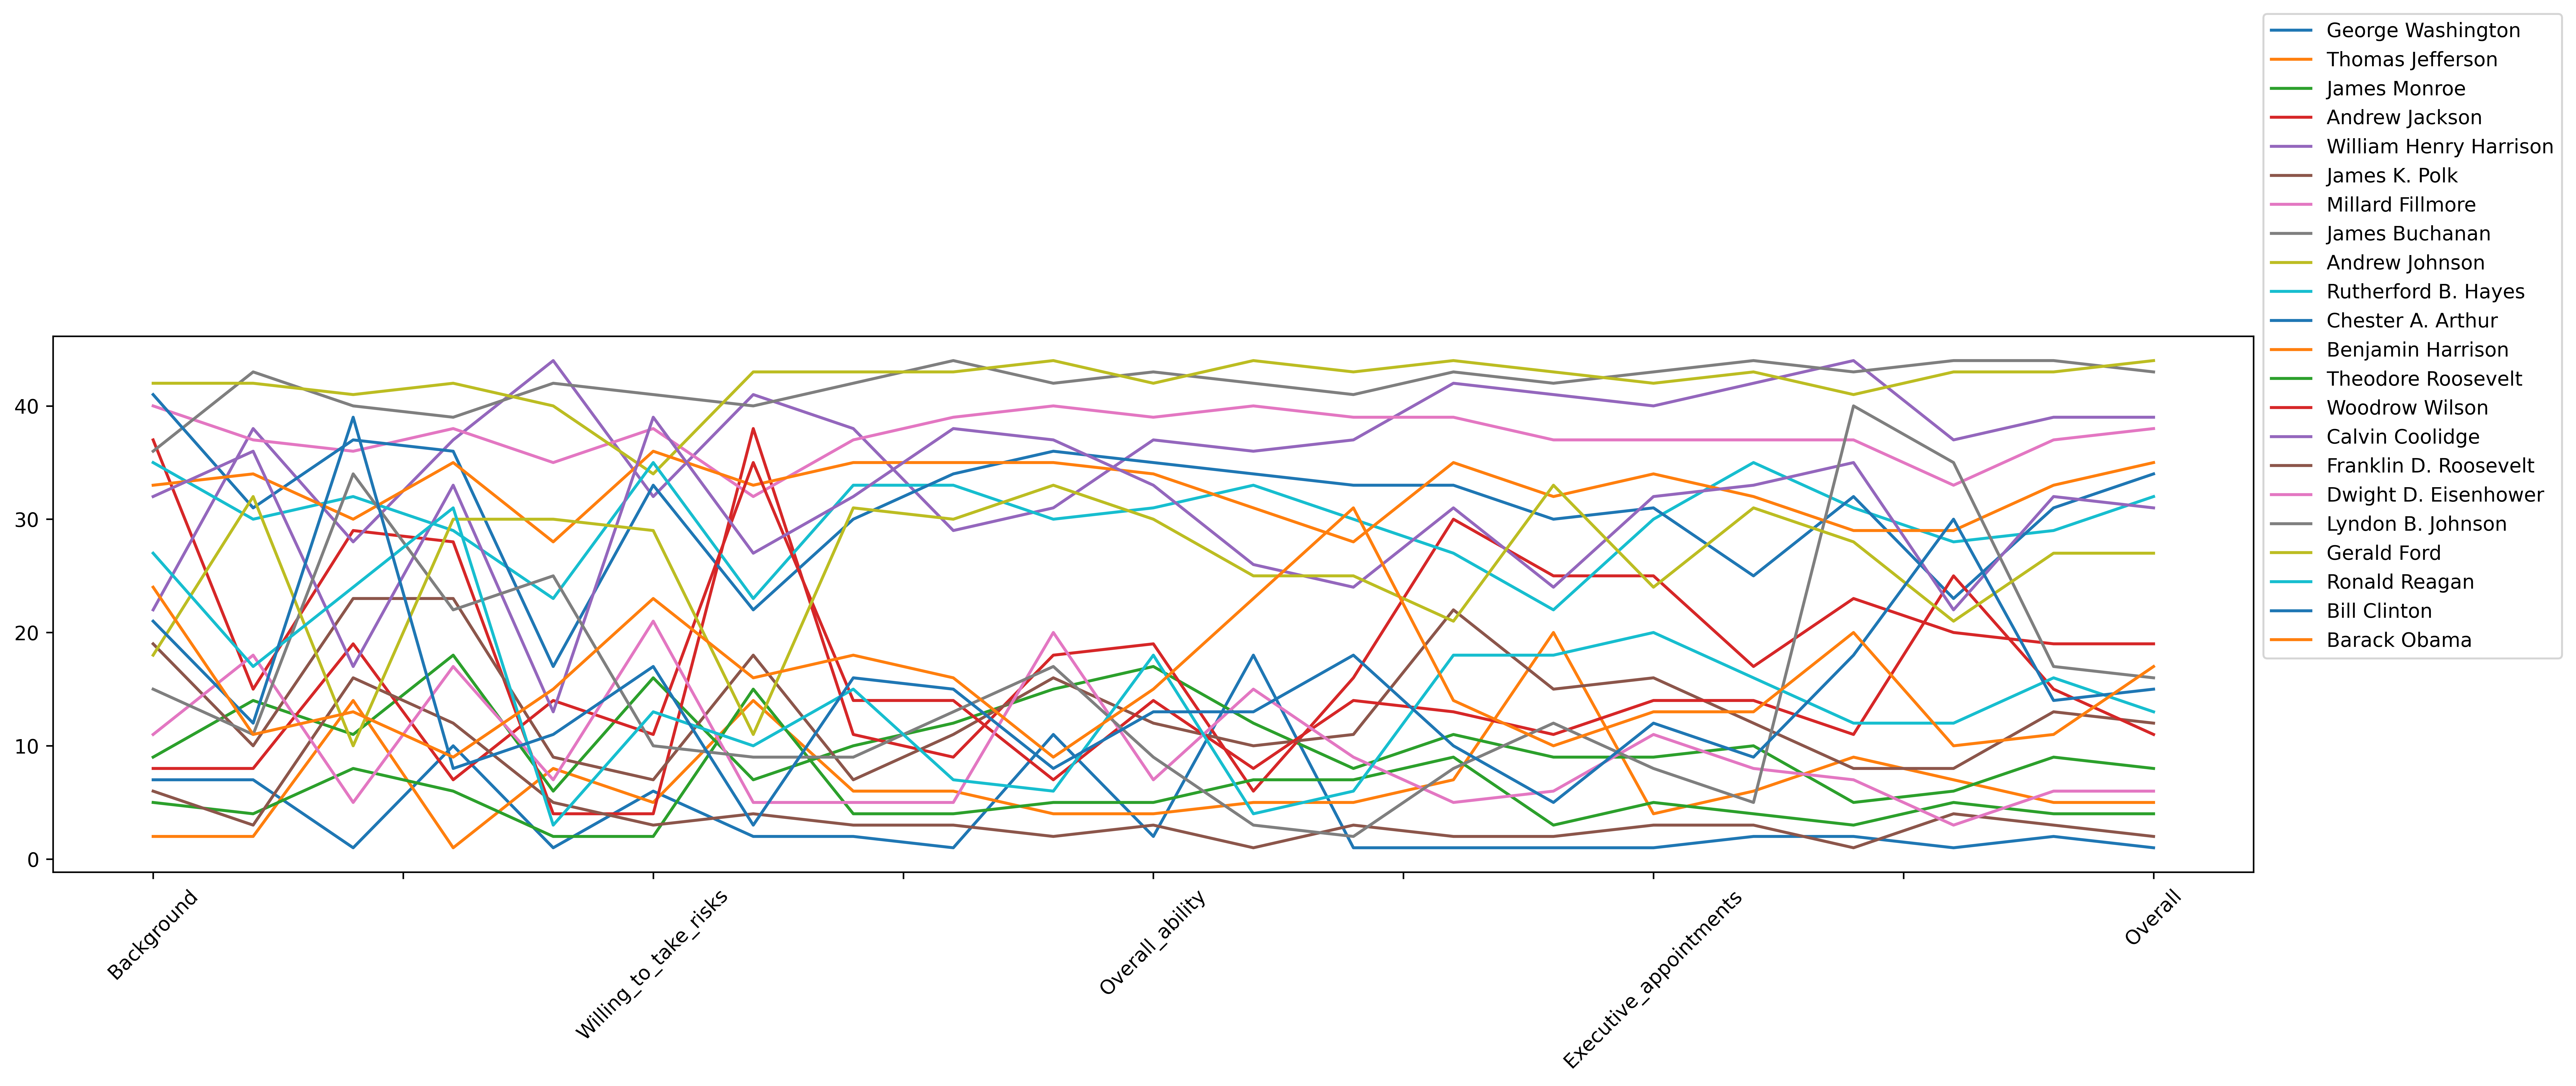

In [31]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(20,5),dpi=600)
(pres
.set_index('President')
.loc[::2,'Background':'Overall']
.T
.plot(ax=ax,rot=45).legend(bbox_to_anchor=(1,1))
)